In [1]:
%qtconsole

In [2]:
%load_ext autoreload
%autoreload 2

In [22]:
%load_ext ipycache

In [3]:
import sys
sys.path.append('/home/jfear/devel/GalaxyTools')

In [120]:
from ba_plot import *
%matplotlib inline

Grab the command line options

In [23]:
args = getOptions()

Create a class for handling Flags

In [27]:
dat = wideToDesign(args.fname, args.dname, args.uniqID, args.group)
wide = dat.wide[dat.sampleIDs]
data = wide

# Create a FlagOutlier object to store all flags
flags = FlagOutlier(dat.wide.index)

# Open a multiple page PDF for plots
pp = PdfPages(args.figName)

In [28]:
# Grab group
grp = dat.design.groupby(dat.group)
i = '02_uM_palmita'
val = grp.get_group(i)

# Create combos
combos = list(combinations(val.index, 2))

In [30]:
%%cache ba_flags.pkl flags

iterateCombo(wide, combos, pp, flags, args.cutoff, group=i)

[Saved variables flags to file '/home/jfear/devel/GalaxyTools/notebook/ba_flags.pkl'.]


/usr/lib/pymodules/python2.7/matplotlib/backends/backend_pdf.py:2184: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


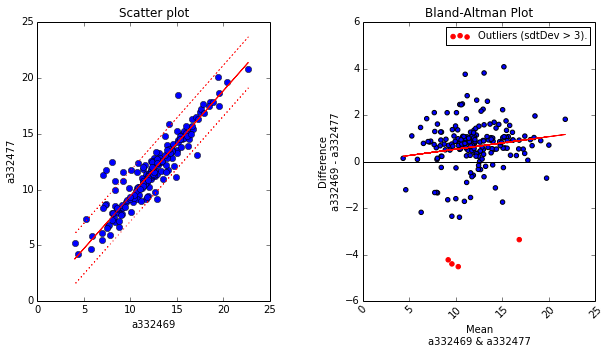

In [15]:
combo = combos[0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=300)
fig.subplots_adjust(wspace=0.4)

# Scatter Plot
ax1 = makeScatter(data[combo[0]], data[combo[1]], ax1)

# BA plot
ax2, outlier = makeBA(data[combo[0]], data[combo[1]], ax2, args.cutoff)